In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from utils import *

## Square Duct Flow 3D

Example regards of Stokes problem:
$$
\nu \varDelta \mathbf{u}\left( x \right) +\nabla p=\mathbf{f}\left( x \right) ,   x\,\,\text{in }\varOmega \,\,
\\
\nabla \mathbf{u}\left( x \right) =\text{0,   }x\,\,\text{in }\varOmega 
$$

A exact solution can be specificed as:
$$
\mathbf{u}=\left( u,\text{0,}0 \right) 
\\
u=-\frac{\varDelta p}{\mu L}\frac{4h^2}{\pi ^3}\sum_{n=\text{1,3,}5...}^{\infty}{\frac{1}{n^3}\left( 1-\frac{\cosh \left( n\pi y/h \right)}{\cosh \left( n\pi /2 \right)} \right) \sin \left( n\pi z/h \right)}
$$



The soluton domain is on a 3D square duct:
$$
\varOmega =\left[ \text{0,}L \right] \times \left[ -h/2,h/2 \right] \times \left[ 0,h \right] 
$$


In [160]:
dp=-10 #pressure drop
L=1
h=1 #height of duct
mu=1

def compute_V(x,y):
    V=0.0
    for i in range(20):
        n=(2*i+1)
        V+=1/n**3*(1-np.cosh(n*np.pi*x/h)/np.cosh(n*np.pi/2))*np.sin(n*np.pi*y/h)
        
    vz=-dp/L/mu*4*h*h/np.pi**3*V
    return vz

def compute_p(x):
    #assume p_out=0
    return -(dp-dp/L*x)

print("max velocity=",abs(compute_V(0,h/2)))
print("mid pressure=",compute_p(L/2))

max velocity= 0.7367034917142333
mid pressure= 5.0


max= 0.7367034917142333


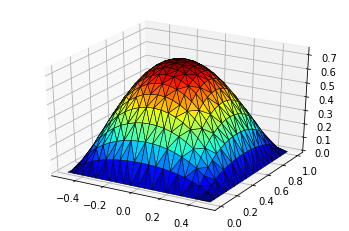

In [161]:
n=21
x = np.linspace(-h/2, h/2, n)
y = np.linspace(0, h, n)
x,y=np.meshgrid(x,y)

x=x.flatten()
y=y.flatten()

z=compute_V(x,y)
print("max=",max(abs(z)))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap="jet", linewidth=0.5,edgecolors='k')

plt.show()